### **Cohort Analysis**

Cohort analysis involves grouping customers based on common characteristics and observing their behavior over time. We want will perform Cohort analysis on our Online sales data to determine : 


- Customers who started in each month and understand their behaviour
-  Which Month cohort has maximum retention?


**Import Libraries**

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

**Read the cleaned data from previous problems**

In [39]:
# read the online sales data 
sales_df = pd.read_csv('online_sales_final.csv')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          52924 non-null  int64  
 1   transaction_id       52924 non-null  int64  
 2   transaction_date     52924 non-null  object 
 3   product_sku          52924 non-null  object 
 4   product_description  52924 non-null  object 
 5   product_category     52924 non-null  object 
 6   quantity             52924 non-null  int64  
 7   avg_price            52924 non-null  float64
 8   delivery_charges     52924 non-null  float64
 9   coupon_status        52924 non-null  object 
 10  month                52924 non-null  object 
 11  gender               52924 non-null  object 
 12  location             52924 non-null  object 
 13  tenure_months        52924 non-null  int64  
 14  gst                  52924 non-null  float64
 15  coupon_code          52924 non-null 

In [40]:
# set transaction date as datetime format 
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])

In [41]:
# create a transaction month feature in format %Y-%m
sales_df['transaction_month'] = sales_df['transaction_date'].dt.strftime('%Y-%m')

In [42]:
# reset index
sales_df.set_index('customer_id', inplace=True)
# Calculate CohortGroup based on the minimum transaction date for each customer
sales_df['cohort_group'] = sales_df.groupby(level=0)['transaction_date'].min().apply(lambda x: x.strftime('%Y-%m'))
sales_df.reset_index(inplace=True)
cohort_data = sales_df.groupby(['cohort_group', 'transaction_month'])

# Calculate cohorts metrics
cohorts = cohort_data.agg({
    'customer_id': pd.Series.nunique,
    'transaction_id': pd.Series.nunique,
    'invoice_value': pd.Series.sum
})

cohorts.rename(columns={'customer_id': 'total_users', 'transaction_id': 'total_orders', 'invoice_value': 'revenue'},
                inplace=True)


# Function to add CohortPeriod
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

# Apply cohort_period function
cohorts = cohorts.groupby(level=0, group_keys=False).apply(cohort_period)

# Reset index for further calculations
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

# Calculate cohort group size for normalization in retention rate calculation
cohort_group_size = cohorts['total_users'].groupby(level=0).first()

# Calculate retention rates
cust_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=1)



**Visualisation**

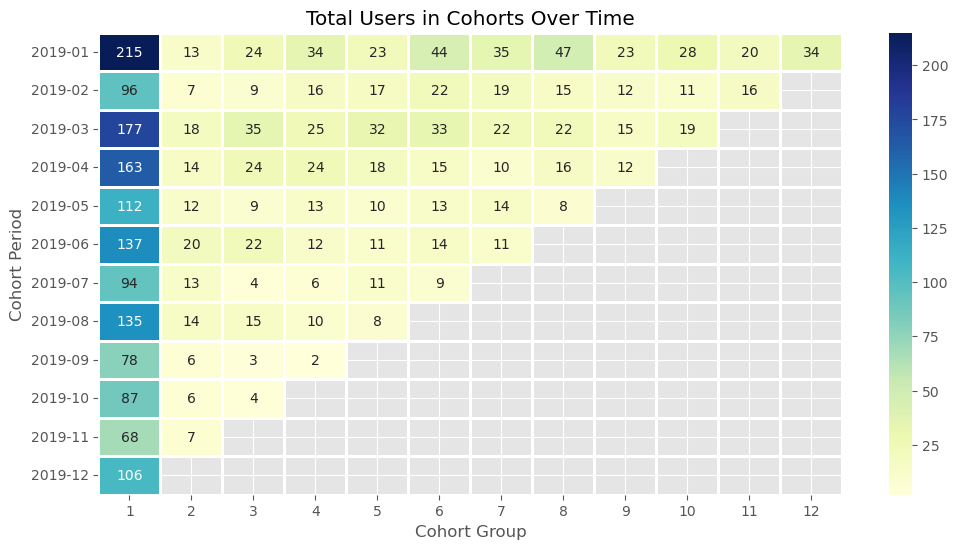

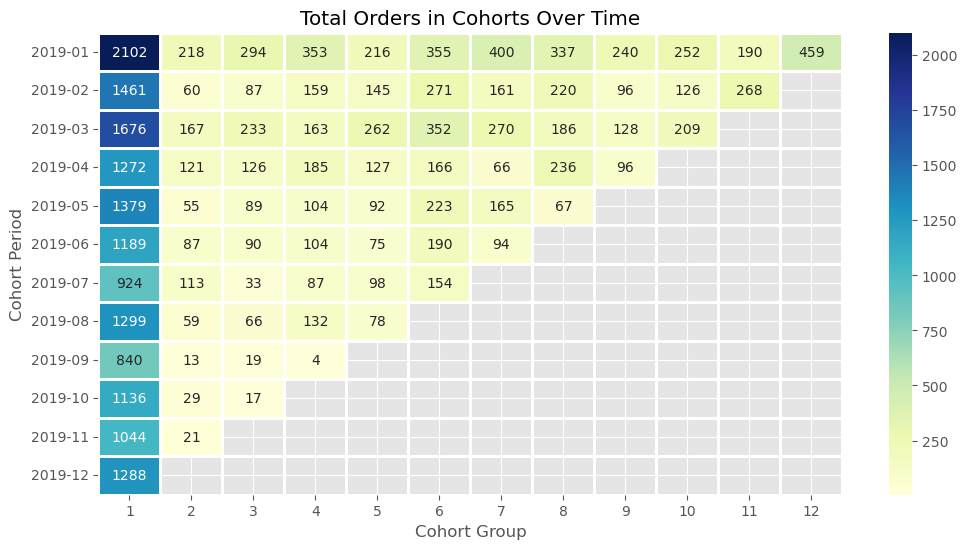

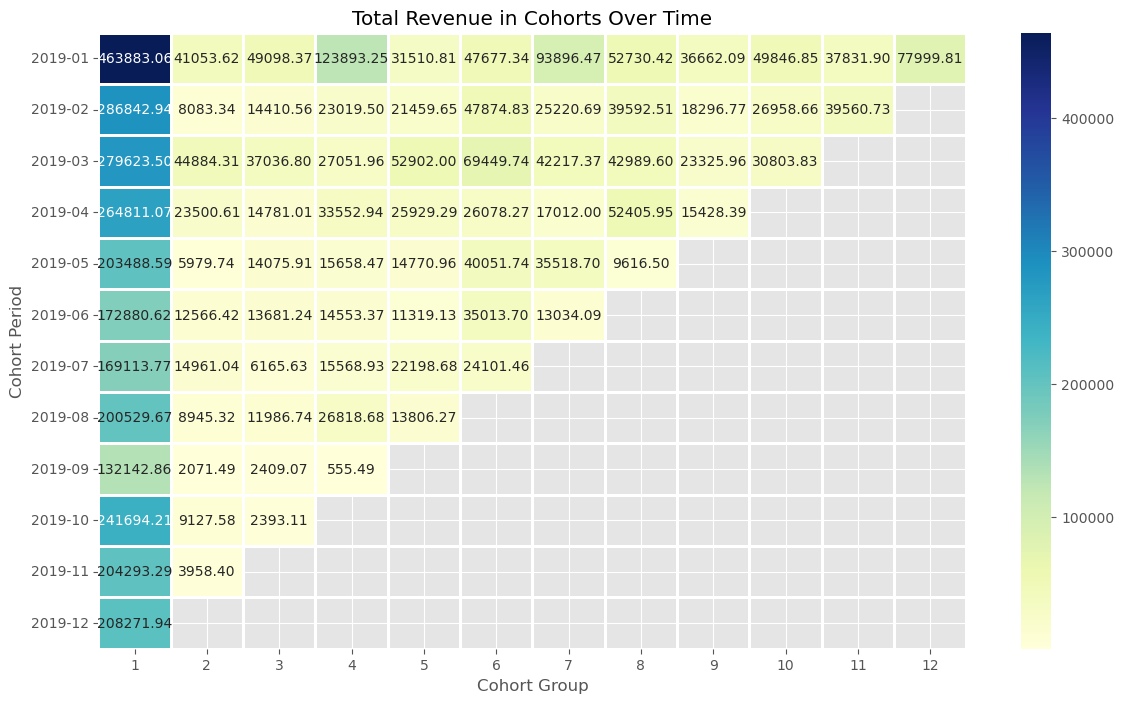

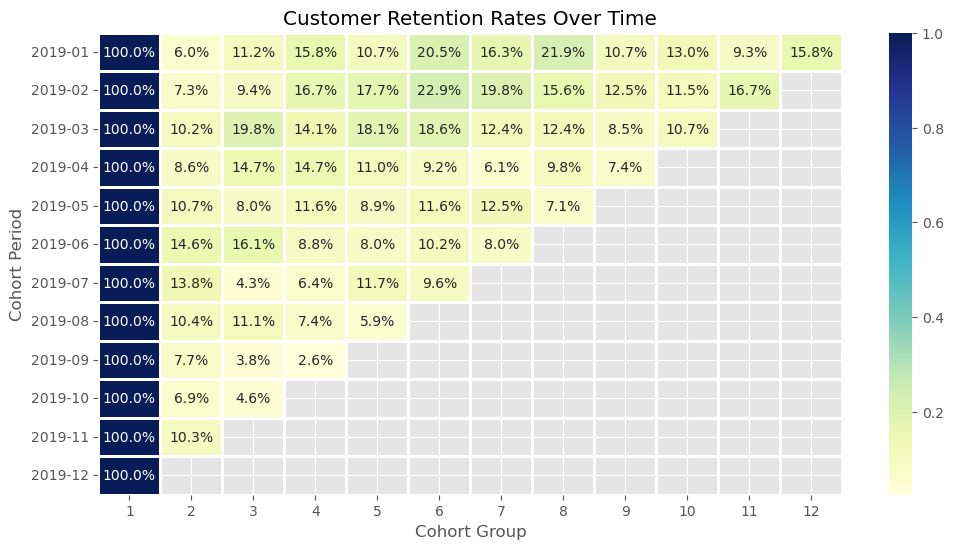

In [43]:
# Visualize cohort metrics using heatmap

# Plot total users over time
plt.figure(figsize=(12, 6))
sns.heatmap(cohorts['total_users'].unstack(0).T, cmap='YlGnBu', annot=True, fmt='g', linewidths=1)
plt.title('Total Users in Cohorts Over Time')
plt.xlabel('Cohort Group')
plt.ylabel('Cohort Period')
plt.show()

# Plot total orders over time
plt.figure(figsize=(12, 6))
sns.heatmap(cohorts['total_orders'].unstack(0).T, cmap='YlGnBu', annot=True, fmt='g', linewidths=1)
plt.title('Total Orders in Cohorts Over Time')
plt.xlabel('Cohort Group')
plt.ylabel('Cohort Period')
plt.show()

# Plot total revenue over time
plt.figure(figsize=(14, 8))
sns.heatmap(cohorts['revenue'].unstack(0).T, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=1)
plt.title('Total Revenue in Cohorts Over Time')
plt.xlabel('Cohort Group')
plt.ylabel('Cohort Period')
plt.show()

# Plot customer retention rates
plt.figure(figsize=(12, 6))
sns.heatmap(cust_retention.T, cmap='YlGnBu', annot=True, fmt='.1%', linewidths=1)
plt.title('Customer Retention Rates Over Time')
plt.xlabel('Cohort Group')
plt.ylabel('Cohort Period')
plt.show()

We can notice from above heatmap that Customer started from `2019-02` has relatively highest retention rate till the end of the year. 